In [24]:
from torchvision.models.detection.image_list import ImageList
from torchvision.models.detection.rpn import AnchorGenerator
import torch
from torch import nn
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [10]:
aug = MNISTAug()
dm = DataManager()
dm.load_test()

/Users/akhildevarashetti/code/ml_gallery/ml_py/lib/mnist_aug/mnist_augmenter.py:444: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


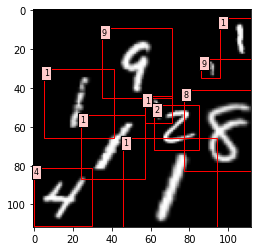

In [16]:
x_test, y_test = aug.get_augmented(dm.x_test, dm.y_test, 2)
DataManager.plot_num(x_test[0], y_test[0])

x_test = torch.FloatTensor(x_test).reshape((2, 1, 112, 112))

In [17]:
feature_extractor = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.ReLU()
)

In [19]:
features = feature_extractor(x_test)
features.shape

torch.Size([2, 512, 14, 14])

In [21]:
gen = AnchorGenerator(sizes=((15, 45, 75),))

In [27]:
image_list = ImageList(x_test, [(112, 112), (112, 112)])
op = gen(image_list, features)

AssertionError: 

In [ ]:
op

